In [1]:
import nltk
import numpy as np
from tqdm.notebook import tqdm_notebook 
import tqdm
import pandas as pd
import os
import math
import warnings
warnings.filterwarnings('ignore')
import argparse
import timeit

from ir_system import IRSystem

In [2]:
df_freqs_poids = pd.read_csv('freq_poids_lancaster.csv')
df_freqs_poids

Document     Terme  Frequence      Poid
0             1        18          1  0.565909
1             1      edit          4  1.417844
2             1     dewey          3  1.566545
3             1     decim          2  0.982483
4             1     class          2  0.497871
...         ...       ...        ...       ...
75461      1460       100          1  0.378243
75462      1460       150          1  0.537625
75463      1460  thousand          1  0.404474
75464      1460       new          1  0.167011
75465      1460  compound          1  0.328574

[75466 rows x 4 columns]

In [3]:
df_freqs_poids['Terme'].unique().shape
unique_terms = list(df_freqs_poids['Terme'].unique())
len(unique_terms)

6039

In [4]:
df_freqs_poids.loc[df_freqs_poids['Document'] == 1]
df = pd.DataFrame(columns = unique_terms)
df

Empty DataFrame
Columns: [18, edit, dewey, decim, class, pres, study, hist, first, ddc, publ, 1876, eighteen, 1971, fut, continu, appear, nee, spit, long, healthy, lif, howev, ful, story, nev, told, biograph, brief, describ, system, attempt, provid, detail, work, spur, grow, libr, country, abroad, us, mad, techn, report, analys, 6300, act, 104, unit, kingdom, on, aspect, wid, pattern, inform, transf, restrict, docu, tak, account, outsid, stil, less, transfer, or, person, channel, proport, situ, whol, doubt, maj, particul, technolog, rath, sci, visit, rar, rely, desk, collect, handbook, cur, period, contact, colleagu, peopl, org, ev, regul, also, receiv, way, two, kind, pow, essay, bibliograph, control, rel, ...]
Index: []

[0 rows x 6039 columns]

In [5]:
for document in df_freqs_poids['Document'].unique():
    temp = df_freqs_poids.loc[df_freqs_poids['Document'] == document]
    temp = temp.drop(['Frequence'], axis=1)
    df.loc[document] = pd.Series((pd.Series(temp.Poid.values,index=temp.Terme.values).to_dict()))

In [6]:
df.fillna(0, inplace=True)
df

18      edit     dewey     decim     class      pres     study  \
1     0.565909  1.417844  1.566545  0.982483  0.497871  0.186318  0.175460   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5     0.000000  0.000000  0.000000  0.000000  0.165957  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1456  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.140368   
1457  0.000000  0.000000  0.000000  0.000000  0.000000  0.093159  0.000000   
1458  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1459  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1460  0.000000  0.000000  0.000000  0.000000  0.000000  0.149054  0.000000   

         hist    first       ddc  ...  trilog  half-century     anglo  \
1     0.66111  0.48747  1.233434  ...     0.0           0.0  0.000000   
2     0.00000  0.00000  0.000000  ...     0.0           0.0  0.000000   
3     0.00000  0.00000  0.000000  ...     0.0           0.0  0.000000   
4     0.00000  0.00000  0.000000  ...     0.0           0.0  0.000000   
5     0.00000  0.16249  0.000000  ...     0.0           0.0  0.000000   
...       ...      ...       ...  ...     ...           ...       ...   
1456  0.00000  0.00000  0.000000  ...     0.0           0.0  0.000000   
1457  0.00000  0.00000  0.000000  ...     0.0           0.0  0.395581   
1458  0.00000  0.00000  0.000000  ...     0.0           0.0  0.000000   
1459  0.88148  0.00000  0.000000  ...     0.0           0.0  0.000000   
1460  0.00000  0.00000  0.000000  ...     0.0           0.0  0.000000   

        monopo       sel     claus      morn  supposit      15%       9%  
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.00000  
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.00000  
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.00000  
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.00000  
5     0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.00000  
...        ...       ...       ...       ...       ...      ...      ...  
1456  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.00000  
1457  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.00000  
1458  1.054883  1.054883  1.054883  1.054883  1.054883  0.00000  0.00000  
1459  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000  0.00000  
1460  0.000000  0.000000  0.000000  0.000000  0.000000  0.63293  0.63293  

[1460 rows x 6039 columns]

In [8]:
df.to_csv('df_poids_lan.csv')

## DBscan

In [9]:
from sklearn.cluster import DBSCAN


In [26]:
df = pd.read_csv('distances.csv')

In [27]:
df.head()

1         2         3         4         5         6         7  \
0  0.805025  0.000000  0.018662  0.027070  0.006798  0.042279  0.047851   
1  0.000000  0.800389  0.027466  0.101121  0.039517  0.038428  0.015176   
2  0.024980  0.050385  0.730271  0.019091  0.010475  0.045179  0.000000   
3  0.019599  0.111904  0.016999  0.869663  0.063982  0.054845  0.046510   
4  0.013963  0.079404  0.008036  0.103811  0.704310  0.076826  0.013574   

          8         9        10  ...      1451      1452      1453      1454  \
0  0.030255  0.039387  0.028121  ...  0.000000  0.007073  0.025160  0.049339   
1  0.035955  0.053661  0.091310  ...  0.031169  0.024241  0.079333  0.024746   
2  0.042415  0.007904  0.008359  ...  0.065433  0.027154  0.009467  0.016103   
3  0.061062  0.069227  0.059354  ...  0.010085  0.017054  0.043987  0.097326   
4  0.040153  0.043257  0.036166  ...  0.013369  0.046021  0.122123  0.061783   

       1455      1456      1457      1458      1459      1460  
0  0.056414  0.042538  0.105889  0.000000  0.000000  0.042435  
1  0.031087  0.063846  0.093681  0.050315  0.014225  0.088477  
2  0.030037  0.009649  0.021973  0.013442  0.000000  0.012174  
3  0.127913  0.047186  0.097815  0.012416  0.039501  0.036381  
4  0.071693  0.069683  0.158987  0.017924  0.015595  0.081016  

[5 rows x 1460 columns]

In [382]:
model = DBSCAN(eps=1.4688888, min_samples=3).fit(df)
labels = np.array(list(model.labels_))
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [383]:
labels[labels == -1].shape

(634,)

In [384]:
labels[labels == 0].shape

(779,)

In [385]:
labels[labels == 4].shape

(4,)

### PCA

In [14]:
from sklearn.decomposition import PCA

In [386]:
pca = PCA(n_components=2)
pca.fit(df)
x_pca = pca.transform(df)
pca_df = pd.DataFrame(x_pca)
pca_df

0         1
0    -0.455808 -0.260237
1    -0.096009  0.312911
2    -0.471861 -0.479942
3     0.089003  0.702187
4    -0.207169  0.433316
...        ...       ...
1455 -0.321140  0.044821
1456 -0.369436  0.501869
1457 -0.677266 -0.391098
1458 -0.372970 -0.498213
1459  0.242413 -0.113700

[1460 rows x 2 columns]

In [387]:
## try to normalize the data
from sklearn import preprocessing

x = pca_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
pca_df_normalized = pd.DataFrame(x_scaled)

In [388]:
pca_df_normalized

0         1
0     0.278896  0.347383
1     0.425996  0.616250
2     0.272333  0.244317
3     0.501636  0.798862
4     0.380549  0.672733
...        ...       ...
1455  0.333954  0.490487
1456  0.314208  0.704892
1457  0.188355  0.285995
1458  0.312763  0.235746
1459  0.564356  0.416124

[1460 rows x 2 columns]

In [535]:
model = DBSCAN(eps=0.02222221, min_samples=7).fit(pca_df_normalized)
labels = np.array(list(model.labels_))
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [536]:
labels[labels == -1].shape

(451,)

In [537]:
labels[labels == 0].shape

(63,)

In [538]:
labels[labels == 1].shape

(354,)

In [539]:
labels[labels == 2].shape

(152,)

In [540]:
import matplotlib.pyplot as plt

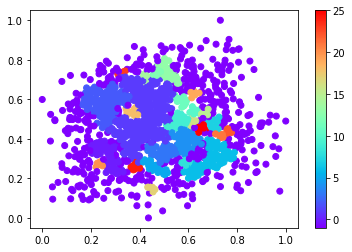

In [541]:
plt.scatter(pca_df_normalized[0],pca_df_normalized[1], c=labels, cmap='rainbow')
plt.colorbar()